# PyTorch Workflow
This document outlines a typical workflow for using PyTorch, (deep learning framework). The workflow includes the following steps:

1. **Import Libraries**: Start by importing the necessary libraries, including PyTorch and any other required packages.


In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
# Creating data; linear regression; --> PyTorch to build model 
# --> gradient descent to estimate parameters

w = 0.8
b = 0.4

start = 0.0
end = 1.0
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze with dim=1 to make it a column vector
y = w * X + b
print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.4000],
        [0.4160],
        [0.4320],
        [0.4480],
        [0.4640],
        [0.4800],
        [0.4960],
        [0.5120],
        [0.5280],
        [0.5440]])


In [4]:
# Splitting data into training and test sets

train_split = int(0.7 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(35, 35, 15, 15)

In [32]:
# Function to visualize the data
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test, predictions=None):
    
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='predictions')

    plt.legend(prop={"size": 9}); #location of legend also can be given using '''loc="lower right"'''

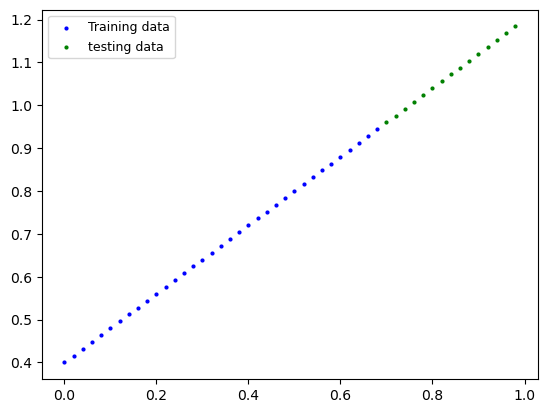

In [33]:
plot_predictions();

In [34]:
# Building the model : Creating a Linear Regression Model Class

class LinearRegressModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


# Model Building essentials
PyTorch has four (give or take) essential modules for building deep learning models:
1. `torch.nn` - neural networks
2. `torch.optim` - optimization algorithms
3. `torch.utils.data` - data loading and processing
4. `torch.utils.dara.DataLoader` - batching, shuffling, loading data in parallel
5. `torchvision` - computer vision utilities and datasets

Almost everything in a PyTorch neural network comes from torch.nn

- `nn.Module` contains the larger building blocks (layers)

- `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))

- `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

- `torch.optim` contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

In [35]:
# Checking the contents of a PyTorch module

torch.manual_seed(42)

model_0 = LinearRegressModel()

print(list(model_0.parameters()))
print(model_0.state_dict()) # -> OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [28]:
# PyTorch having two modes:
'''Training mode
PyTorch needs to think, remember, and track everything
- Track gradients
- Save history of operations
- Update weights '''

# Inference (prediction) mode

'''PyTorch only needs to calculate outputs, not learn
- No gradients
- No memory tracking
- Faster + uses less RAM '''
# Use torch.inference_mode() when making predictions with a trained model — it’s faster, uses less memory, and makes sure gradients don’t get tracked accidentally.

with torch.inference_mode():
    y_predictions = model_0(X_test)

print(f"No. of testing samples: {len(X_test)} ")
print(f"No. of predictions made: {len(y_predictions)}")
print(f"Predicted values:\n{y_predictions}")

No. of testing samples: 15 
No. of predictions made: 15
Predicted values:
tensor([[0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


- In Linear Regression Example, we can see that one X value maps to one y value. In Deep Learning, we can have multiple X values mapping to multiple y values. as machine learning models are very flexible. You could have 100 input feature mapping to 1,2,10 etc. output features. It all depends on the problem you are trying to solve.

tensor([[0.5955],
        [0.6048],
        [0.6140],
        [0.6233],
        [0.6326],
        [0.6418],
        [0.6511],
        [0.6604],
        [0.6696],
        [0.6789],
        [0.6882],
        [0.6974],
        [0.7067],
        [0.7160],
        [0.7252]])


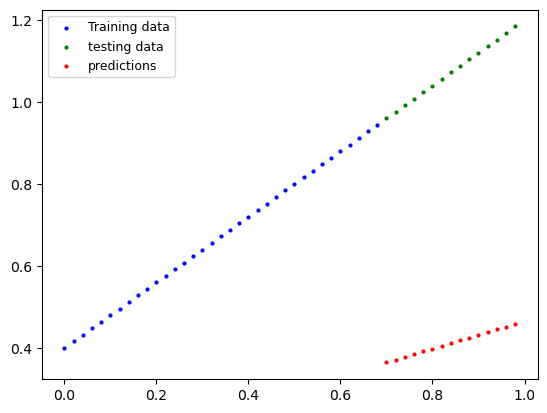

In [36]:
plot_predictions(predictions=y_predictions)
print(y_test - y_predictions)

We can see in this that predictions lokk pretty bad, as in our model we have used random parameter values *(weights and biases)* to make predictions. Next, we will see how to improve these parameters using optimization algorithms.

In [ ]:
# Training the Model
